In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
def R2Euler(mat):
    if len( np.shape(mat) ) == 2:
        mat = mat[None, :, :]
    R_sum = np.sqrt(( mat[:,0,0]**2 + mat[:,0,1]**2 + mat[:,1,2]**2 + mat[:,2,2]**2 ) / 2)
    phi = np.arctan2(-mat[:,1,2],mat[:,2,2])
    theta = np.arctan2(mat[:,0,2], R_sum)
    psi = np.arctan2(-mat[:,0,1], mat[:,0,0])
    angs = np.array([phi, theta, psi])
    return angs

### Get ground truth transformations

500000


<IPython.core.display.Javascript object>


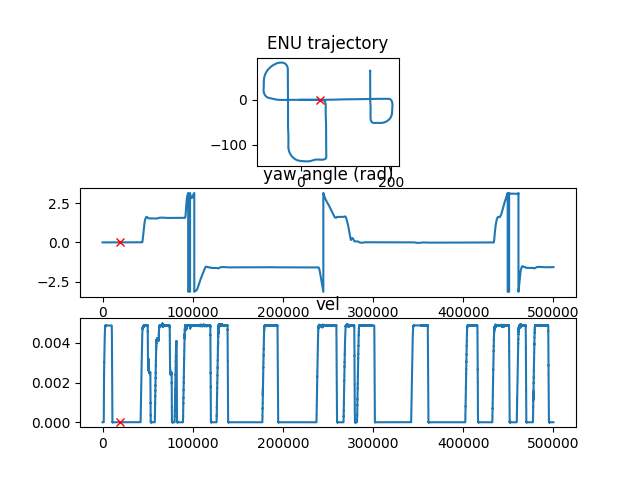

(3, 499999)


In [4]:
# town = 'Town01'
# town = 'Town02'
# town = 'Town03'
town = 'Town05'
# town = 'Town07'
idx = 193 #1050 for town1, 50 for town7

fpl = np.loadtxt("/home/derm/KITTICARLA/dataset/" + town + "/generated/full_poses_lidar.txt") #full poses lidar
print(np.shape(fpl))

#plot pose at arbitrary point in drive NEED TO MULTIPLY THIS BY 100??!
#create rotation vector
R = np.array([[fpl[:,0], fpl[:,1], fpl[:,2]],
              [fpl[:,4], fpl[:,5], fpl[:,6]],
              [fpl[:,8], fpl[:,9], fpl[:,10]]]).T
angs = R2Euler(R) #convert to euler angles (for use with ICET)

T = np.array([fpl[:,3], fpl[:,7], fpl[:,11]]).T #get translation vector

#plot results
fig, ax = plt.subplots(3,1)
ax[0].plot(T[:,0], T[:,1])
ax[0].plot(T[idx*100,0], T[idx*100,1], 'rx')
ax[0].set_aspect("equal")
ax[0].set_title("ENU trajectory")

ax[1].set_title("yaw angle (rad)")
ax[1].plot(angs[2,:])
ax[1].plot(idx*100, angs[2,idx*100], 'rx')

#TODO: get change in angles between subsequent transformations, fix angs greater than 2pi
vel = np.diff(T.T)
print(np.shape(vel))
ax[2].set_title("vel")
ax[2].plot(np.sqrt(vel[0,:]**2 + vel[1,:]**2))
ax[2].plot(idx*100, vel[0,idx*100], 'rx')

#sanity check for consistant timesteps...
# dt = np.diff(fpl[:,12])
# bad = dt[abs(dt[:] - 0.001) > 0.00001]
# print(bad)

In [5]:
# ICET_estimates = np.loadtxt("KC_results/town03_ICET_estimates.txt")
# ICET_pred_stds = np.loadtxt("KC_results/town03_ICET_pred_stds.txt")
# ground_truth = np.loadtxt("KC_results/town03_ground_truth.txt")

ICET_estimates = np.loadtxt("KC_results/town07_ICET_estimates.txt")
ICET_pred_stds = np.loadtxt("KC_results/town07_ICET_pred_stds.txt")

<IPython.core.display.Javascript object>


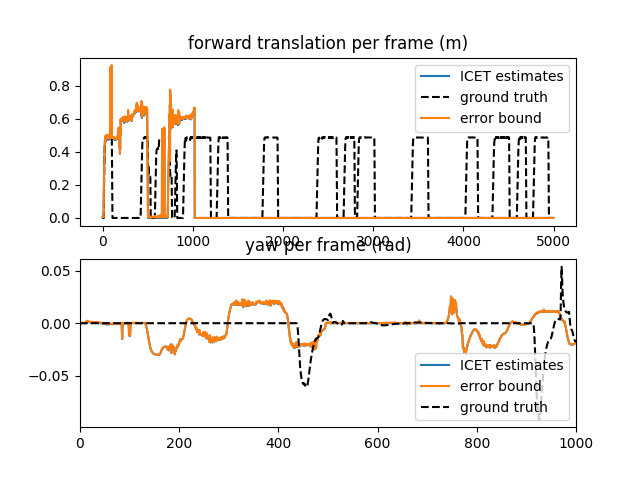

In [6]:
fig, ax = plt.subplots(2,1)

ax[0].set_title('forward translation per frame (m)')
# forward_movement = ax.plot(ICET_estimates[:,0])
forward_movement = np.sqrt(ICET_estimates[:,0]**2 + ICET_estimates[:,1]**2)
ax[0].plot(forward_movement, label = 'ICET estimates')
ground_truth_forward = np.sqrt(vel[0,:]**2 + vel[1,:]**2)[0:-1:100]*100
ax[0].plot(ground_truth_forward, 'k--', label = 'ground truth')
ax[0].plot(2*ICET_pred_stds[:,0] + forward_movement, label = 'error bound')
ax[0].legend(loc = 'best')



ground_truth_yaw = -np.diff(angs[2,0:-1:100])
ground_truth_yaw[np.where(ground_truth_yaw > 1.0)] -= 2*np.pi  #get rid of jumps
ground_truth_yaw[np.where(ground_truth_yaw < -1.0)] += 2*np.pi

ax[1].set_title('yaw per frame (rad)')
ax[1].plot(ICET_estimates[:,5], label = 'ICET estimates')
ax[1].plot(ICET_estimates[:,5] + 2*ICET_pred_stds[:,5], label = 'error bound' )
ax[1].plot(ground_truth_yaw, 'k--', label = 'ground truth')
ax[1].set_xlim(0,1000)
ax[1].legend(loc = 'best')